# Introduction:

Data phishing has emerged as a prevalent and successful method employed by cybercriminals to deceive individuals and illicitly obtain their personal and financial information. In our increasingly internet-dependent world, where we conduct a significant portion of our daily activities online, fraudsters have found a fertile ground to execute targeted phishing attacks. These modern-day phishing attempts have become remarkably sophisticated, making them harder to detect. Astonishingly, a recent study conducted by Intel revealed that an overwhelming 97% of security experts failed to differentiate between genuine emails and phishing emails. This alarming statistic underscores the urgent need for a deeper understanding of data phishing and the implementation of robust countermeasures to safeguard ourselves from these insidious attacks.

# Problem statement:
For many years, phishing attacks have been a disaster. They are causing more and more concern on a global scale.

As a data scientist you set the goal of using data science and machine learning to find a solution to this issue.

# Objective:
To build a machine learning model that detects the website as fraudulent must be built in order to stop phishing attacks.

# Source for the dataset
* 

# About the dataset
The dataset provided consists of a total of 10,000 urls and it encompasses 18 distinct features that have been extracted. Its primary purpose is to serve as a benchmark for machine learning-driven systems that specialize in detecting phishing attempts. It is noteworthy that this dataset has been meticulously balanced, as it contains an equal distribution of 50% phishing URLs and 50% legitimate URLs. This ensures that the dataset accurately represents both types of URLs for comprehensive analysis and evaluation.

### Importing required libraries 

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing data 

In [83]:
data=pd.read_csv("Phishing_Data.csv")
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,creativemarket.com,0,0,1,3,0,0,1,0,0.0,1.0,0.0,1.0,0,0,1,1,0
1,fareast.qa,0,0,1,3,0,0,0,0,1.0,1.0,1.0,1.0,1,0,1,0,1
2,rocketnews24.com,0,0,1,2,0,0,0,0,0.0,1.0,1.0,1.0,0,0,1,0,0
3,girlsgettinggoals.com,0,0,0,2,0,0,0,0,0.0,1.0,0.0,1.0,0,0,1,0,1
4,olx.ua,0,0,1,3,0,0,0,0,0.0,1.0,1.0,1.0,0,0,1,0,0


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,creativemarket.com,0,0,1,3,0,0,1,0,0.0,1.0,0.0,1.0,0,0,1,1,0
1,fareast.qa,0,0,1,3,0,0,0,0,1.0,1.0,1.0,1.0,1,0,1,0,1
2,rocketnews24.com,0,0,1,2,0,0,0,0,0.0,1.0,1.0,1.0,0,0,1,0,0
3,girlsgettinggoals.com,0,0,0,2,0,0,0,0,0.0,1.0,0.0,1.0,0,0,1,0,1
4,olx.ua,0,0,1,3,0,0,0,0,0.0,1.0,1.0,1.0,0,0,1,0,0


In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,nepan.org.np,0,0,0,3,0,0,0,0,0.0,0.0,1.0,1.0,0,0,1,0,1
1,therockacc.org,0,0,1,4,0,0,0,0,0.0,1.0,0.0,0.0,0,0,1,0,1
2,telltaleswriting.com,0,0,1,5,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,1
3,serverfault.com,0,0,1,3,0,0,1,0,0.0,1.0,0.0,1.0,0,0,1,0,0
4,autoinsquoter.com,0,0,0,2,1,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,1


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,nepan.org.np,0,0,0,3,0,0,0,0,0.0,0.0,1.0,1.0,0,0,1,0,1
1,therockacc.org,0,0,1,4,0,0,0,0,0.0,1.0,0.0,0.0,0,0,1,0,1
2,telltaleswriting.com,0,0,1,5,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,1
3,serverfault.com,0,0,1,3,0,0,1,0,0.0,1.0,0.0,1.0,0,0,1,0,0
4,autoinsquoter.com,0,0,0,2,1,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,1


### Understanding the data

In [ ]:
# Finding the shape of the dataset
data.shape

(22744, 18)

(22744, 18)

In [ ]:
# Features of the data
data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22744 entries, 0 to 22743
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Domain         22744 non-null  object 
 1   Have_IP        22744 non-null  int64  
 2   Have_At        22744 non-null  int64  
 3   URL_Length     22744 non-null  int64  
 4   URL_Depth      22744 non-null  int64  
 5   Redirection    22744 non-null  int64  
 6   https_Domain   22744 non-null  int64  
 7   TinyURL        22744 non-null  int64  
 8   Prefix/Suffix  22744 non-null  int64  
 9   DNS_Record     10000 non-null  float64
 10  Web_Traffic    10000 non-null  float64
 11  Domain_Age     10000 non-null  float64
 12  Domain_End     10000 non-null  float64
 13  iFrame         22744 non-null  int64  
 14  Mouse_Over     22744 non-null  int64  
 15  Right_Click    22744 non-null  int64  
 16  Web_Forwards   22744 non-null  int64  
 17  Label          22744 non-null  int64  
dtypes: flo

In [ ]:
# Finding null values
data.isna().sum()

Domain               0
Have_IP              0
Have_At              0
URL_Length           0
URL_Depth            0
Redirection          0
https_Domain         0
TinyURL              0
Prefix/Suffix        0
DNS_Record       12744
Web_Traffic      12744
Domain_Age       12744
Domain_End       12744
iFrame               0
Mouse_Over           0
Right_Click          0
Web_Forwards         0
Label                0
dtype: int64

Domain               0
Have_IP              0
Have_At              0
URL_Length           0
URL_Depth            0
Redirection          0
https_Domain         0
TinyURL              0
Prefix/Suffix        0
DNS_Record       12744
Web_Traffic      12744
Domain_Age       12744
Domain_End       12744
iFrame               0
Mouse_Over           0
Right_Click          0
Web_Forwards         0
Label                0
dtype: int64

As the null values in the data of DNS_Record , Web_Traffic, Domain_Age and Domain_End are having large number of null values, we can drop the columns form the dataset.

In [ ]:
# Dropping the attributes DNS_Record , Web_Traffic, Domain_Age and Domain_End
data.drop(['DNS_Record','Web_Traffic','Domain_Age','Domain_End'],axis=1,inplace=True)

In [ ]:
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,nepan.org.np,0,0,0,3,0,0,0,0,0,0,1,0,1
1,therockacc.org,0,0,1,4,0,0,0,0,0,0,1,0,1
2,telltaleswriting.com,0,0,1,5,0,0,0,0,0,0,0,0,1
3,serverfault.com,0,0,1,3,0,0,1,0,0,0,1,0,0
4,autoinsquoter.com,0,0,0,2,1,0,0,0,0,0,0,0,1


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,nepan.org.np,0,0,0,3,0,0,0,0,0,0,1,0,1
1,therockacc.org,0,0,1,4,0,0,0,0,0,0,1,0,1
2,telltaleswriting.com,0,0,1,5,0,0,0,0,0,0,0,0,1
3,serverfault.com,0,0,1,3,0,0,1,0,0,0,1,0,0
4,autoinsquoter.com,0,0,0,2,1,0,0,0,0,0,0,0,1


In [ ]:
data.shape

(22744, 14)

(22744, 14)

In [ ]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.00000,22744.000000
mean,0.002418,0.024754,0.572679,2.669803,0.356973,0.000703,0.040538,0.136520,0.259981,0.249472,0.659603,0.42996,0.560324
std,0.049117,0.155377,0.494701,2.013150,0.479117,0.026514,0.197222,0.343347,0.438633,0.432717,0.473853,0.57228,0.496359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
75%,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.00000,1.000000


,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.00000,22744.000000
mean,0.002418,0.024754,0.572679,2.669803,0.356973,0.000703,0.040538,0.136520,0.259981,0.249472,0.659603,0.42996,0.560324
std,0.049117,0.155377,0.494701,2.013150,0.479117,0.026514,0.197222,0.343347,0.438633,0.432717,0.473853,0.57228,0.496359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
75%,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.00000,1.000000


The results mentioned above reveal that, with the exception of the "URL_Depth" column, the dataset is mostly made up of 0s and 1s. Furthermore, the 'Domain' feature has no impact on the machine learning model that may be created with this dataset, as can be seen. Therefore, it is safe to remove the field "Domain" from the dataset.

In [ ]:
# Dropping the 'Domain' feild
data.drop(['Domain'],axis=1,inplace=True)

In [ ]:
# Checking the shape of the dataset 
data.shape

(22744, 13)

(22744, 13)

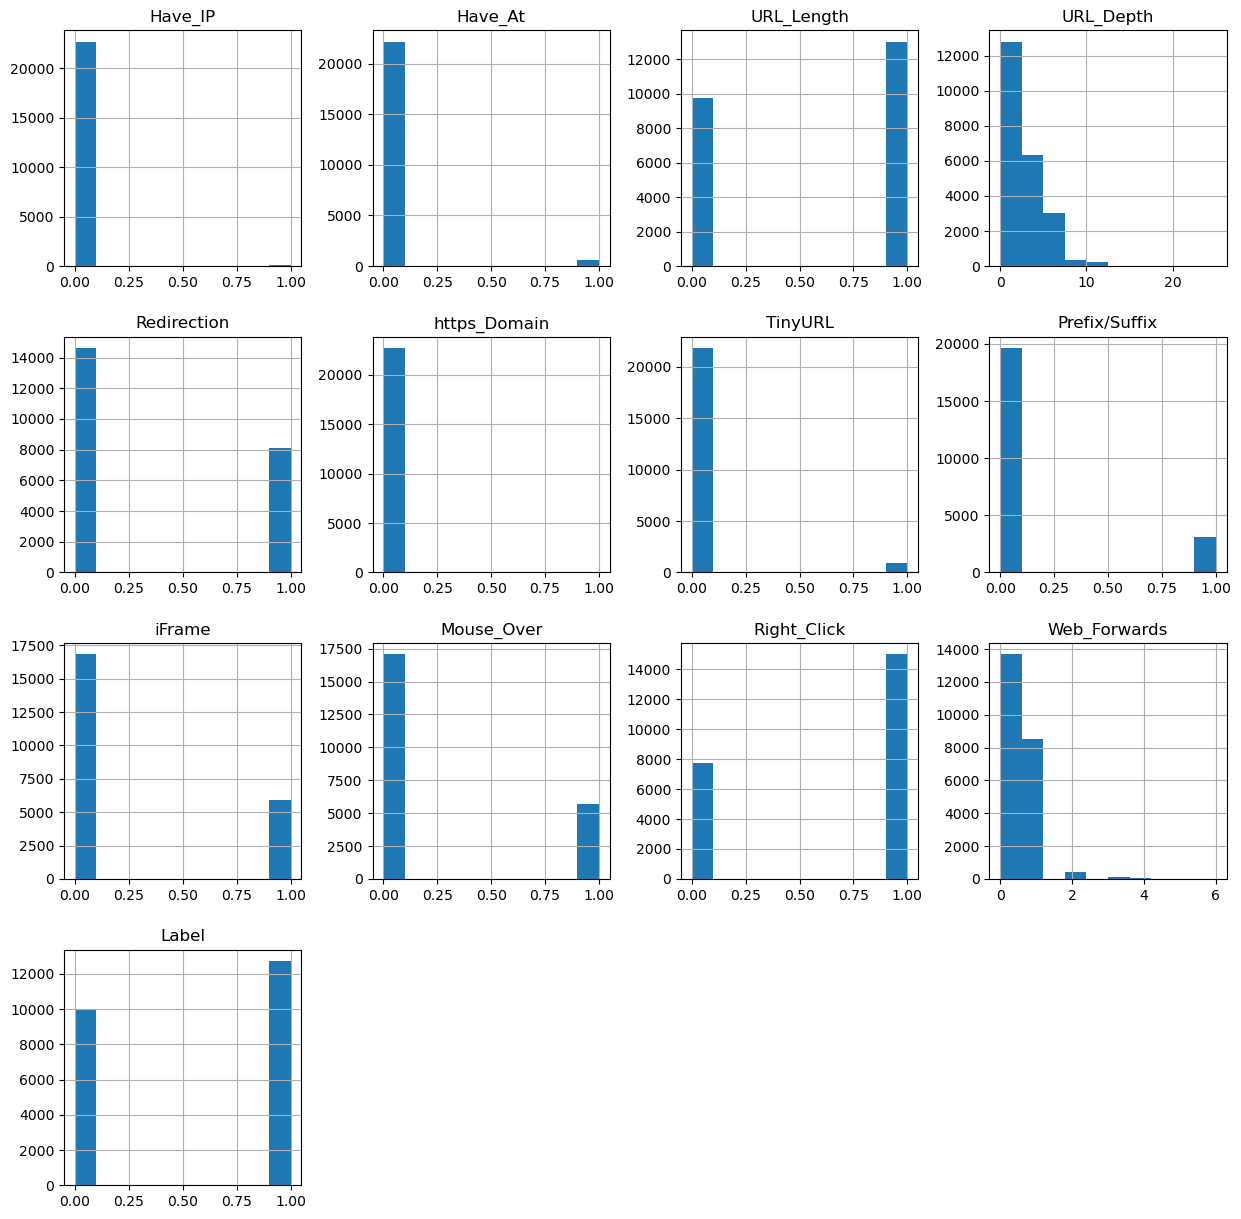

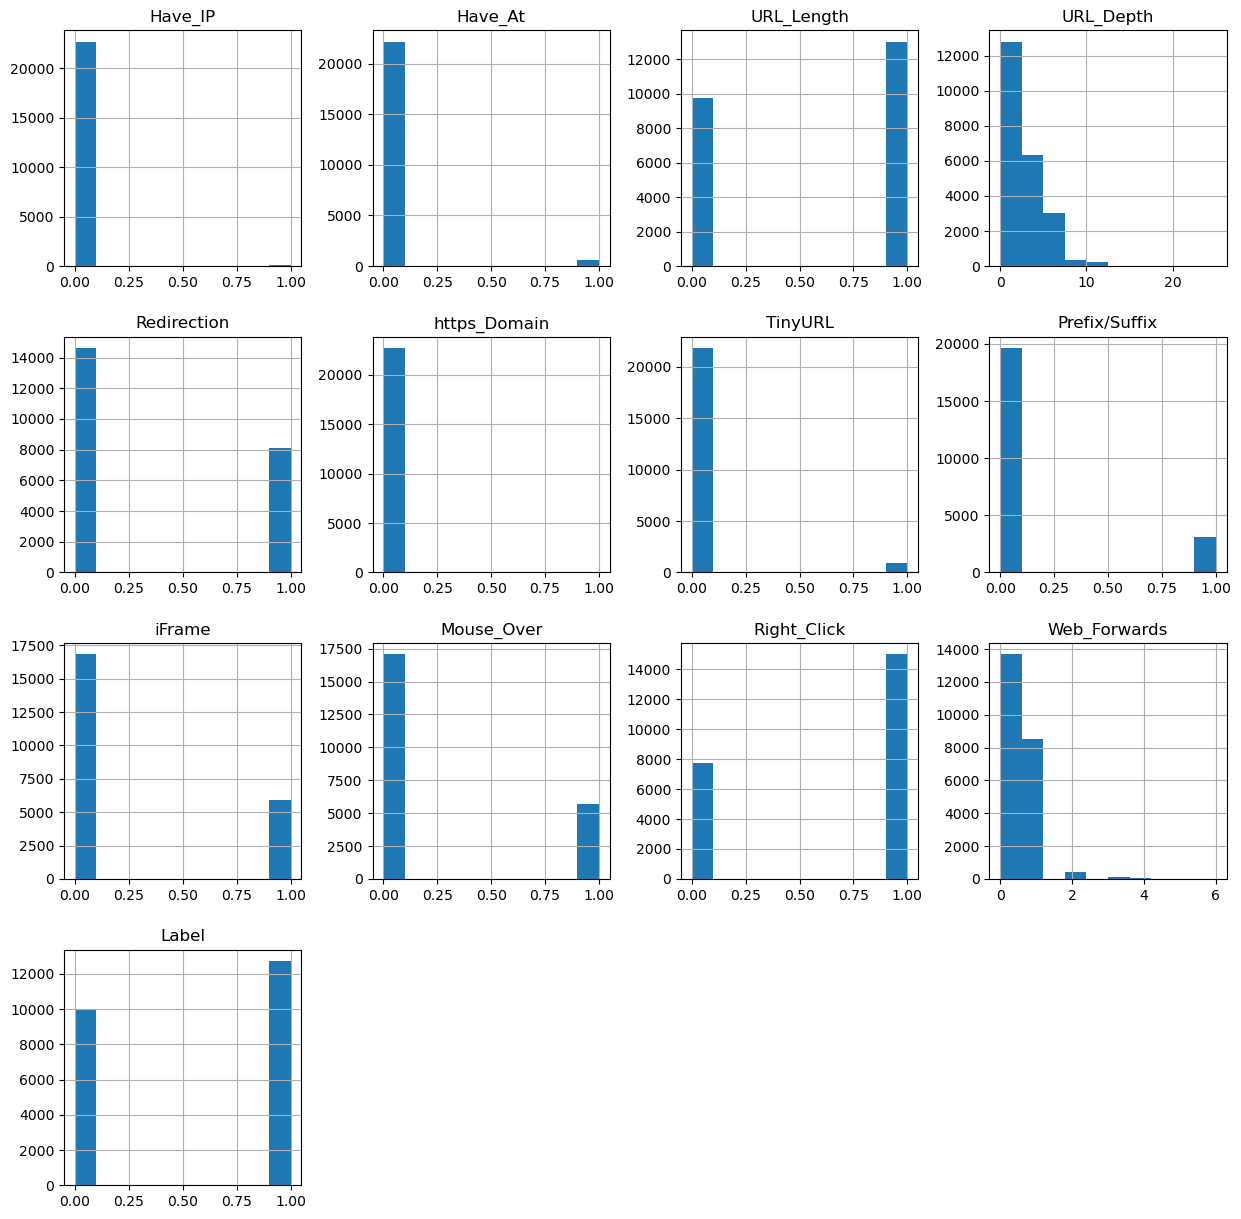

In [ ]:
data.hist(figsize = (15,15))
plt.show()

In [ ]:
y=data['Label']
X=data.drop(['Label'],axis=1)
X.shape,y.shape

((22744, 12), (22744,))

((22744, 12), (22744,))

# Splitting the data

In [ ]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=12)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15920, 12) (6824, 12) (15920,) (6824,)
(15920, 12) (6824, 12) (15920,) (6824,)


In [ ]:

# Creating holders to store the model performance results
Model = []
Train_Accuracy = []
Test_Accuracy = []

#function to call for storing the results
def accuracy_scores(model, a,b):
  Model.append(model)
  Train_Accuracy.append((a*100))
  Test_Accuracy.append((b*100))

# Decision tree algorithm


Decision trees are used for classification and regression tasks. It is a hierarchical model that uses a tree-like model of decisions and their possible consequences

In [ ]:
# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#creating a model
tree = DecisionTreeClassifier()
#fitting the model
tree.fit(X_train, y_train)

DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
dta_train_acc = accuracy_score(y_train,y_train_tree)
dta_test_acc = accuracy_score(y_test,y_test_tree)

In [ ]:
print("DTA: Accuracy on training Data: {:.3f}".format(dta_train_acc))
print("DTA : Accuracy on test Data: {:.3f}".format(dta_test_acc))

DTA: Accuracy on training Data: 0.916
DTA : Accuracy on test Data: 0.909
DTA: Accuracy on training Data: 0.916
DTA : Accuracy on test Data: 0.909


In [ ]:
accuracy_scores('Decision Tree', dta_train_acc, dta_test_acc)

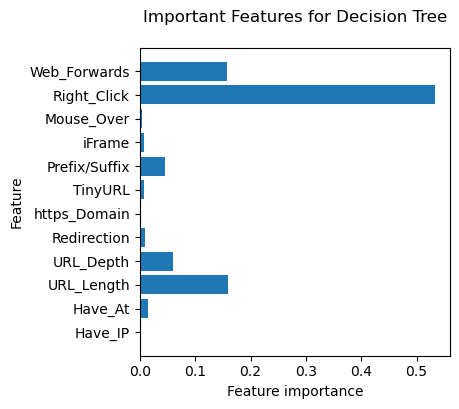

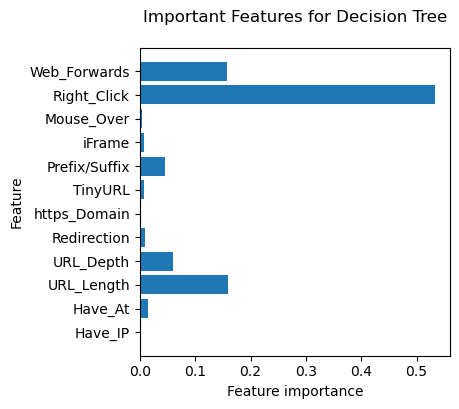

In [ ]:
# Knowing the importance features in the data 

plt.figure(figsize=(4,4))
plt.title('Important Features for Decision Tree\n')
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# Random Forest Algorithm

Random forest is a commonly-used machine learning algorithm which combines the output of multiple decision trees to reach a single result.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

RandomForestClassifier()

In [ ]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
rfa_train_acc = accuracy_score(y_train,y_train_forest)
rfa_test_acc = accuracy_score(y_test,y_test_forest)

In [ ]:
print("RFA: Accuracy on training Data: {:.3f}".format(rfa_train_acc))
print("RFA : Accuracy on test Data: {:.3f}".format(rfa_test_acc))

RFA: Accuracy on training Data: 0.916
RFA : Accuracy on test Data: 0.910
RFA: Accuracy on training Data: 0.916
RFA : Accuracy on test Data: 0.910


In [ ]:
accuracy_scores('Random Forest Algorithm', rfa_train_acc, rfa_test_acc)

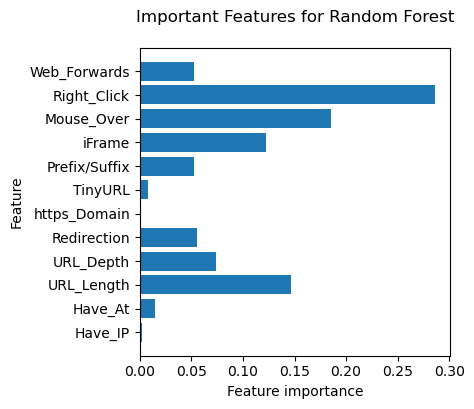

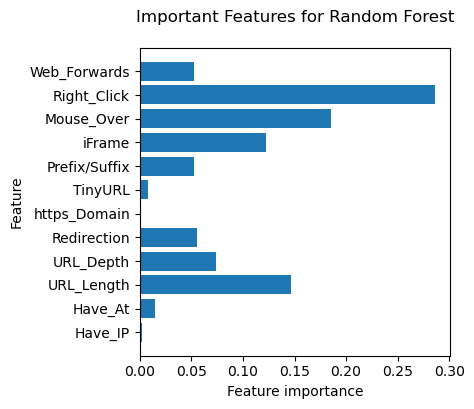

In [ ]:
# Knowing the importance features in the data 

plt.figure(figsize=(4,4))
plt.title('Important Features for Random Forest\n')
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

LGBMClassifier()

In [ ]:
y_test_model = model.predict(X_test)
y_train_model = model.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
lgbm_train_acc = accuracy_score(y_train,y_train_model)
lgbm_test_acc = accuracy_score(y_test,y_test_model)

print("LGBM: Accuracy on training Data: {:.3f}".format(lgbm_train_acc))
print("LGBM: Accuracy on test Data: {:.3f}".format(lgbm_test_acc))

LGBM: Accuracy on training Data: 0.916
LGBM: Accuracy on test Data: 0.910
LGBM: Accuracy on training Data: 0.916
LGBM: Accuracy on test Data: 0.910


In [ ]:
accuracy_scores('LightGBM', lgbm_train_acc, lgbm_test_acc)

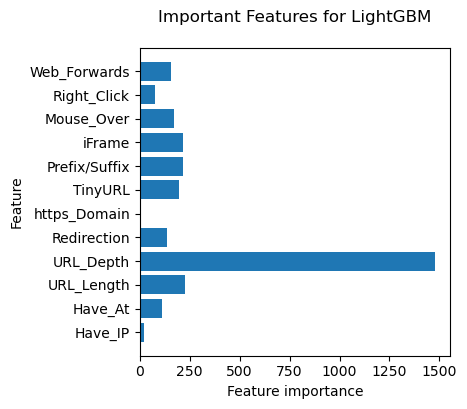

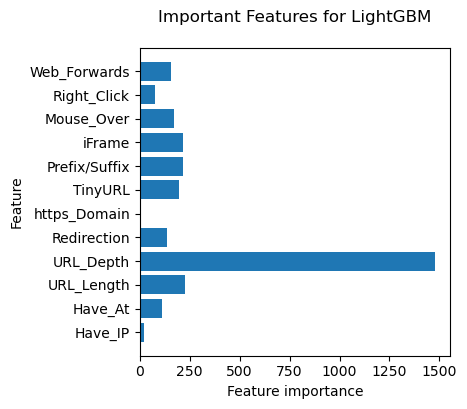

In [ ]:

# Knowing the importance features in the data 

plt.figure(figsize=(4,4))
plt.title('Important Features for LightGBM\n')
n_features = X_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

SVC(C=0.1, gamma=1, kernel='linear')

In [ ]:
y_test_svm = svc_model.predict(X_test)
y_train_svm = svc_model.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.896
SVM : Accuracy on test Data: 0.897
SVM: Accuracy on training Data: 0.896
SVM : Accuracy on test Data: 0.897


In [ ]:
accuracy_scores('Support Vector Machine', acc_train_svm, acc_test_svm)

# Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
#computing the accuracy of the model performance

y_test_gnb = gnb.predict(X_test)
y_train_gnb = gnb.predict(X_train)

In [ ]:
gnb_train_acc = accuracy_score(y_train,y_train_gnb)
gnb_test_acc = accuracy_score(y_test,y_test_gnb)

print('gnb: Accuracy of the Gaussian Naïve Bayes on training data: {:.3f}'.format(gnb_train_acc))
print('gnb: Accuracy of the Gaussian Naïve Bayes on test data: {:.3f}'.format(gnb_test_acc))

gnb: Accuracy of the Gaussian Naïve Bayes on training data: 0.790
gnb: Accuracy of the Gaussian Naïve Bayes on test data: 0.791
gnb: Accuracy of the Gaussian Naïve Bayes on training data: 0.790
gnb: Accuracy of the Gaussian Naïve Bayes on test data: 0.791


In [ ]:
# Storing in data of the accuracy scores
accuracy_scores('Gaussian Naïve Bayes',gnb_train_acc, gnb_test_acc)

# XFBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb =XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#computing the accuracy of the model performance

y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:

xgb_train_acc = accuracy_score(y_train,y_train_xgb)
xgb_test_acc = accuracy_score(y_test,y_test_xgb)

print('XGB: Accuracy of XGBoost on training Data: {:.3f}'.format(xgb_train_acc))
print('XGB: Accuracy of XGBoost on test Data: {:.3f}'.format(xgb_test_acc))

XGB: Accuracy of XGBoost on training Data: 0.916
XGB: Accuracy of XGBoost on test Data: 0.910
XGB: Accuracy of XGBoost on training Data: 0.916
XGB: Accuracy of XGBoost on test Data: 0.910


In [ ]:
accuracy_scores('XGBoost', xgb_train_acc, xgb_test_acc)

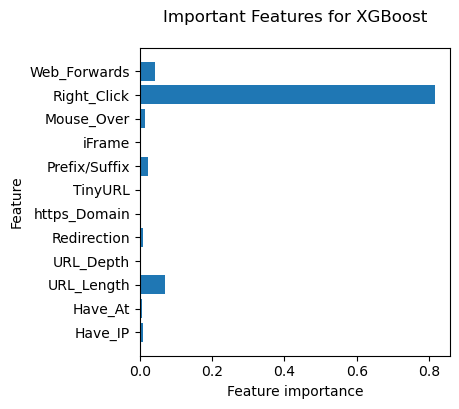

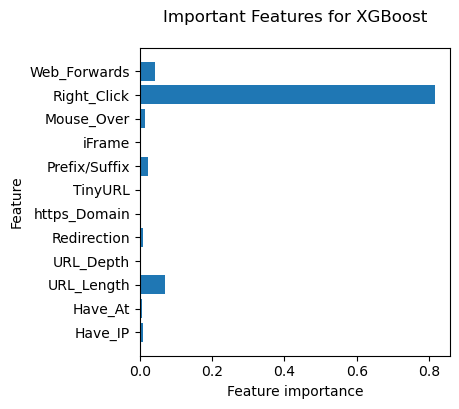

In [ ]:
# Knowing the importance features in the data 

plt.figure(figsize=(4,4))
plt.title('Important Features for XGBoost\n')
n_features = X_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': Model,'Train Accuracy': Train_Accuracy,'Test Accuracy': Test_Accuracy})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,91.589196,90.929074
1,Random Forest Algorithm,91.589196,91.002345
2,LightGBM,91.557789,91.002345
3,Support Vector Machine,89.629397,89.668816
4,Gaussian Naïve Bayes,79.007538,79.088511
5,XGBoost,91.564070,91.002345


,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,91.589196,90.929074
1,Random Forest Algorithm,91.589196,91.002345
2,LightGBM,91.557789,91.002345
3,Support Vector Machine,89.629397,89.668816
4,Gaussian Naïve Bayes,79.007538,79.088511
5,XGBoost,91.564070,91.002345


In [ ]:
results.sort_values(by=['Train Accuracy', 'Test Accuracy'], ascending = False)

,ML Model,Train Accuracy,Test Accuracy
1,Random Forest Algorithm,91.589196,91.002345
0,Decision Tree,91.589196,90.929074
5,XGBoost,91.564070,91.002345
2,LightGBM,91.557789,91.002345
3,Support Vector Machine,89.629397,89.668816
4,Gaussian Naïve Bayes,79.007538,79.088511


,ML Model,Train Accuracy,Test Accuracy
1,Random Forest Algorithm,91.589196,91.002345
0,Decision Tree,91.589196,90.929074
5,XGBoost,91.564070,91.002345
2,LightGBM,91.557789,91.002345
3,Support Vector Machine,89.629397,89.668816
4,Gaussian Naïve Bayes,79.007538,79.088511


# Model Building

In [ ]:
import pickle

In [ ]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(forest, file)